<a href="https://colab.research.google.com/github/Tanish00singh/chat-app/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

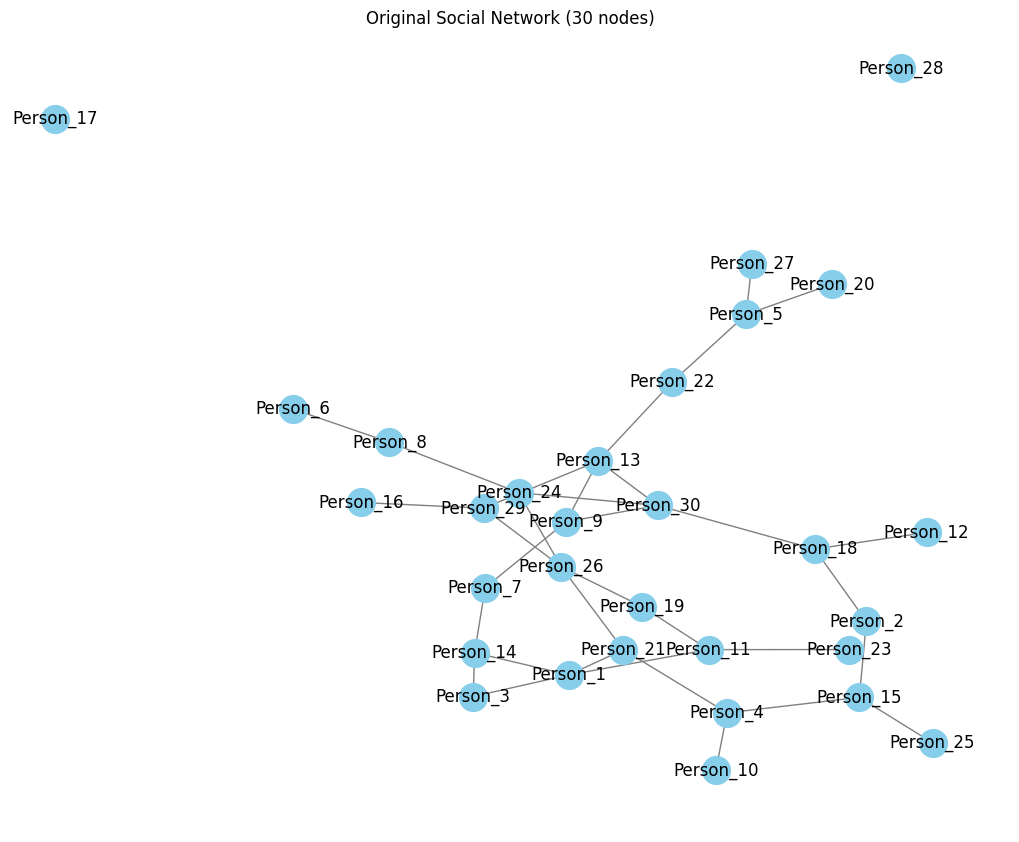

/tmp/ipython-input-1836138866.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette = plt.cm.get_cmap('tab20', num_communities)


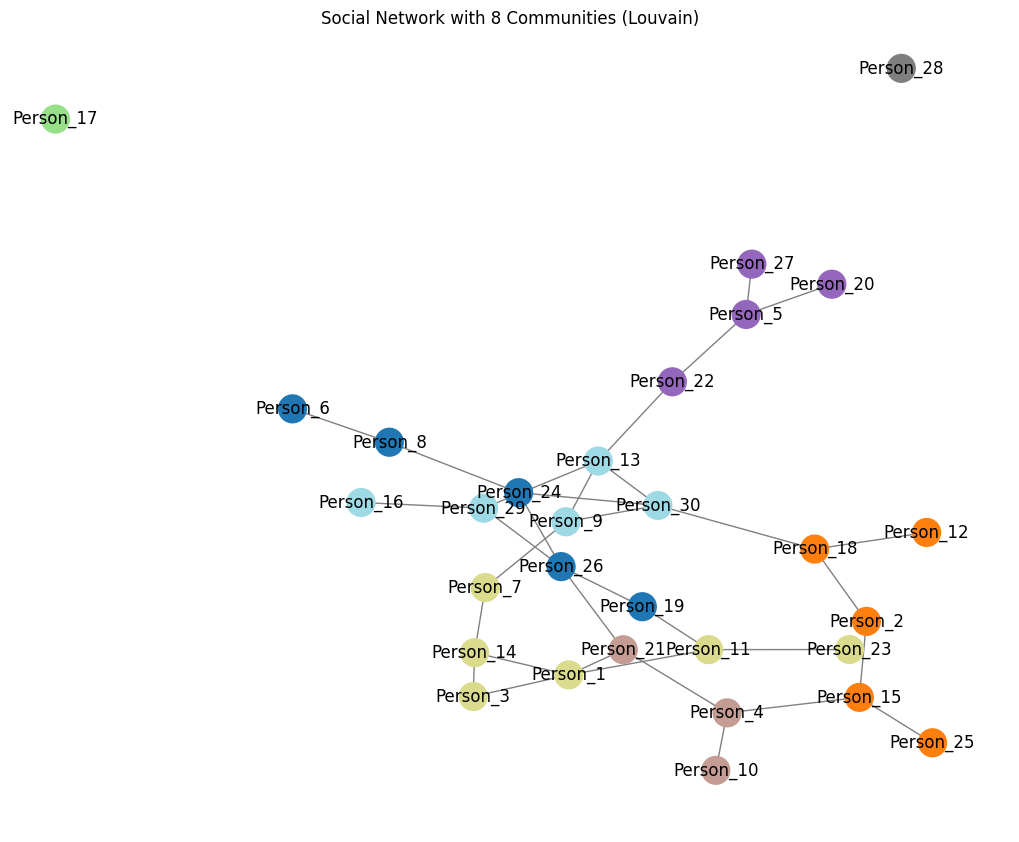

=== Communities Detected ===
Community 7: ['Person_1', 'Person_3', 'Person_7', 'Person_11', 'Person_14', 'Person_23']
Community 2: ['Person_2', 'Person_12', 'Person_15', 'Person_18', 'Person_25']
Community 5: ['Person_4', 'Person_10', 'Person_21']
Community 4: ['Person_5', 'Person_20', 'Person_22', 'Person_27']
Community 1: ['Person_6', 'Person_8', 'Person_19', 'Person_24', 'Person_26']
Community 8: ['Person_9', 'Person_13', 'Person_16', 'Person_29', 'Person_30']
Community 3: ['Person_17']
Community 6: ['Person_28']


In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain
import random

# 1. Create synthetic social network with 30 nodes
G = nx.erdos_renyi_graph(30, 0.08, seed=42)

# Assign labels
labels = {i:f"Person_{i+1}" for i in G.nodes()}

# 2. Plot original graph
plt.figure(figsize=(10,8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, labels=labels, node_color="skyblue", node_size=400, edge_color="gray")
plt.title("Original Social Network (30 nodes)")
plt.show()

# 3. Community detection using Louvain (similar to Walktrap)
partition = community_louvain.best_partition(G)

# Assign colors
num_communities = len(set(partition.values()))
palette = plt.cm.get_cmap('tab20', num_communities)
colors = [palette(partition[node]) for node in G.nodes()]

# 4. Plot graph with communities
plt.figure(figsize=(10,8))
nx.draw(G, pos, with_labels=True, labels=labels, node_color=colors, node_size=400, edge_color="gray")
plt.title(f"Social Network with {num_communities} Communities (Louvain)")
plt.show()

# 5. Print communities
communities = {}
for node, comm in partition.items():
    communities.setdefault(comm, []).append(labels[node])

print("=== Communities Detected ===")
for comm, members in communities.items():
    print(f"Community {comm+1}: {members}")

